<a href="https://colab.research.google.com/github/iam-krj/Deep-Learning/blob/main/7_DL_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Backpropagation

##Importing Libraries


In [ ]:
!pip install scikit_learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt #Graph Plotting

##Load Dataset

In [ ]:
dataset = load_iris()
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

##Segregating Data into X(Input) & Y(Output)

In [ ]:
x = dataset.data
y = dataset.target
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

##Convert categorical variable into dummy/indicator variables

In [ ]:
y = pd.get_dummies(y).values
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

##Split dataset into Train & Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state = 4)

##Initializing Weights

In [ ]:
np.random.seed(10)
input_size = 4
hidden_size = 2
output_size = 3
firstWeight = np.random.normal(scale=0.5, size = (input_size, hidden_size))
lastWeight =  np.random.normal(scale=0.5, size = (hidden_size, output_size) )

firstWeight

array([[ 0.66579325,  0.35763949],
       [-0.77270015, -0.00419192],
       [ 0.31066799, -0.36004278],
       [ 0.13275579,  0.05427426]])

##Initializing Hyper Parameters

In [ ]:
learningRate = 0.1
epoch = 5000
N = y_train.size
input_size = 4
hidden_size = 2
output_size = 3
results = pd.DataFrame(columns=["MeanSquareError", "Accuracy"])

##Activation Function

In [ ]:
def activationFn(x):
    return 1 / (1+np.exp(-x))

##Mean Squared Error

In [ ]:
def mse(y_pred,y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

##Evaluation Function - Accuracy

In [ ]:
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis = 1)
    return acc.mean()

##Training

In [105]:
   for i in range(epoch):
      # feedforward propagation on hidden layer
      firstNetInput = np.dot(X_train, firstWeight)
      firstAFnOp = activationFn(firstNetInput)

      ## feedforward propagation on output layer
      lastNetInput = np.dot(firstAFnOp, lastWeight)
      lastAFnOp = activationFn(lastNetInput)

      #Calculating Error
      mseValue = mse(lastAFnOp, y_train)
      acc = accuracy(lastAFnOp, y_train)
      results = results.append({"MeanSquareError":mseValue, "accuracy":acc},ignore_index =True)

      #BackPropagation
      E1 = lastAFnOp - y_train
      dfirstWeight = E1*lastAFnOp * (1 - lastAFnOp)

      E2 = np.dot(dfirstWeight, lastWeight.T)
      dlastWeight = E2* firstAFnOp* (1 - firstAFnOp)

      #Weight Updates
      lastWeight_update = np.dot(firstAFnOp.T, dfirstWeight) / N
      firstWeight_update = np.dot(X_train.T, dlastWeight) / N

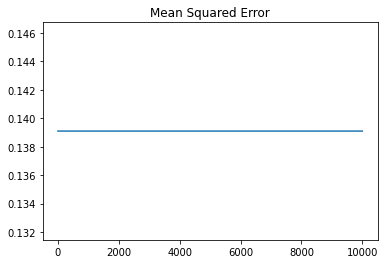

In [104]:
results.MeanSquareError.plot(title="Mean Squared Error")

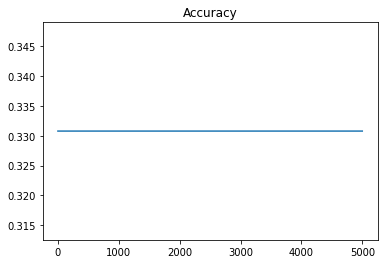

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
firstNetInput = np.dot(X_test, firstWeight)
firstAFnOp = activationFn(firstNetInput)

lastNetInput = np.dot(firstAFnOp, lastWeight)
lastAFnOp = activationFn(lastNetInput)

acc = accuracy(lastAFnOp, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.35
